In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [3]:
def selectionSort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [4]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [5]:
def quickSort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quickSort(left) + middle + quickSort(right)

In [6]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        mergeSort(L)
        mergeSort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [7]:
def heapSort(arr):
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[i] < arr[l]:
            largest = l

        if r < n and arr[largest] < arr[r]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)
    for i in range(n//2, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

In [8]:
array_lengths = [300, 600, 900, 1200, 1500, 1800,2100]
sorting_functions = [bubbleSort, selectionSort, insertionSort, quickSort, mergeSort, heapSort]
results = {func.__name__: [] for func in sorting_functions}
results1 = {func.__name__: [] for func in sorting_functions}
results2 = {func.__name__: [] for func in sorting_functions}

In [9]:
# For unsorted array
for length in array_lengths:
    arr = np.random.randint(0, 10000, size=length)
    for sort_func in sorting_functions:
        arr_copy = arr.copy()
        start_time = time.time()
        sort_func(arr_copy)
        end_time = time.time()
        time_taken = end_time - start_time
        results[sort_func.__name__].append(time_taken)
        print(f"Array length: {length},    Sorting algorithm: {sort_func.__name__},    Time taken: {time_taken:.4f} seconds")


Array length: 300,    Sorting algorithm: bubbleSort,    Time taken: 0.0503 seconds
Array length: 300,    Sorting algorithm: selectionSort,    Time taken: 0.0340 seconds
Array length: 300,    Sorting algorithm: insertionSort,    Time taken: 0.0315 seconds
Array length: 300,    Sorting algorithm: quickSort,    Time taken: 0.0020 seconds
Array length: 300,    Sorting algorithm: mergeSort,    Time taken: 0.0040 seconds
Array length: 300,    Sorting algorithm: heapSort,    Time taken: 0.0060 seconds
Array length: 600,    Sorting algorithm: bubbleSort,    Time taken: 0.1831 seconds
Array length: 600,    Sorting algorithm: selectionSort,    Time taken: 0.0889 seconds
Array length: 600,    Sorting algorithm: insertionSort,    Time taken: 0.0810 seconds
Array length: 600,    Sorting algorithm: quickSort,    Time taken: 0.0030 seconds
Array length: 600,    Sorting algorithm: mergeSort,    Time taken: 0.0070 seconds
Array length: 600,    Sorting algorithm: heapSort,    Time taken: 0.0132 seconds


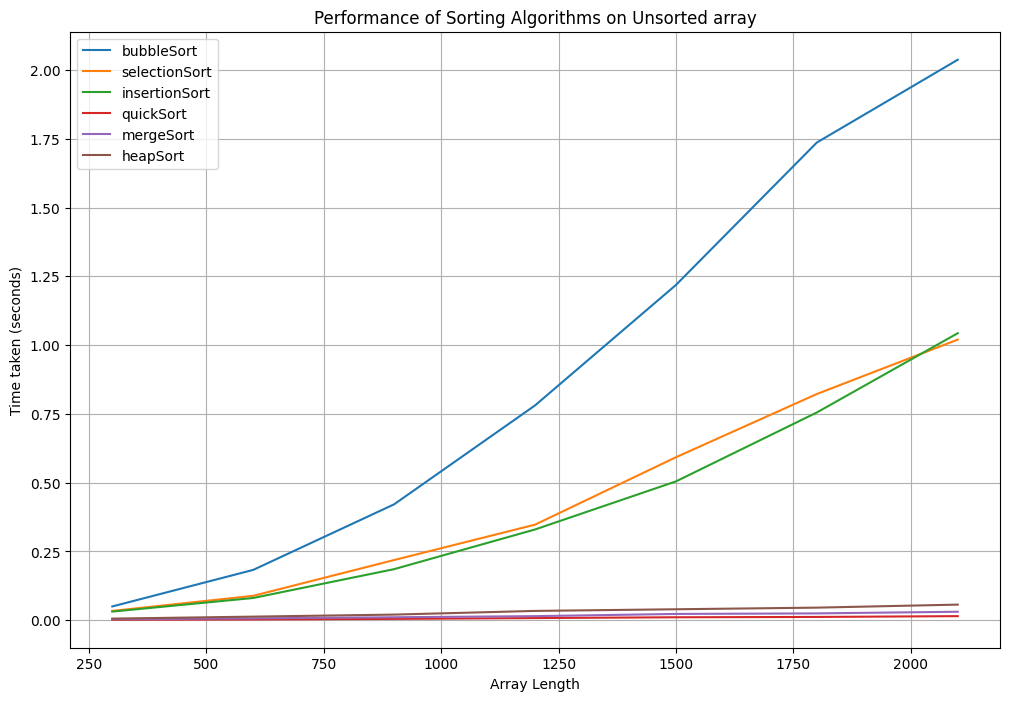

In [10]:
plt.figure(figsize=(12, 8))

for sort_func in sorting_functions:
    plt.plot(array_lengths, results[sort_func.__name__], label=sort_func.__name__)

plt.xlabel('Array Length')
plt.ylabel('Time taken (seconds)')
plt.title('Performance of Sorting Algorithms on Unsorted array')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
for length in array_lengths:
    arr = np.random.randint(0, 10000, size=length)
    for sort_func in sorting_functions:
        arr_copy = np.sort(arr)
        start_time = time.time()
        sort_func(arr_copy)
        end_time = time.time()
        time_taken = end_time - start_time
        results1[sort_func.__name__].append(time_taken)
        print(f"Array length: {length},    Sorting algorithm: {sort_func.__name__},    Time taken: {time_taken:.6f} seconds")


Array length: 300,    Sorting algorithm: bubbleSort,    Time taken: 0.018225 seconds
Array length: 300,    Sorting algorithm: selectionSort,    Time taken: 0.021006 seconds
Array length: 300,    Sorting algorithm: insertionSort,    Time taken: 0.000000 seconds
Array length: 300,    Sorting algorithm: quickSort,    Time taken: 0.018992 seconds
Array length: 300,    Sorting algorithm: mergeSort,    Time taken: 0.004023 seconds
Array length: 300,    Sorting algorithm: heapSort,    Time taken: 0.005005 seconds
Array length: 600,    Sorting algorithm: bubbleSort,    Time taken: 0.094297 seconds
Array length: 600,    Sorting algorithm: selectionSort,    Time taken: 0.095994 seconds
Array length: 600,    Sorting algorithm: insertionSort,    Time taken: 0.001007 seconds
Array length: 600,    Sorting algorithm: quickSort,    Time taken: 0.059675 seconds
Array length: 600,    Sorting algorithm: mergeSort,    Time taken: 0.007001 seconds
Array length: 600,    Sorting algorithm: heapSort,    Time 

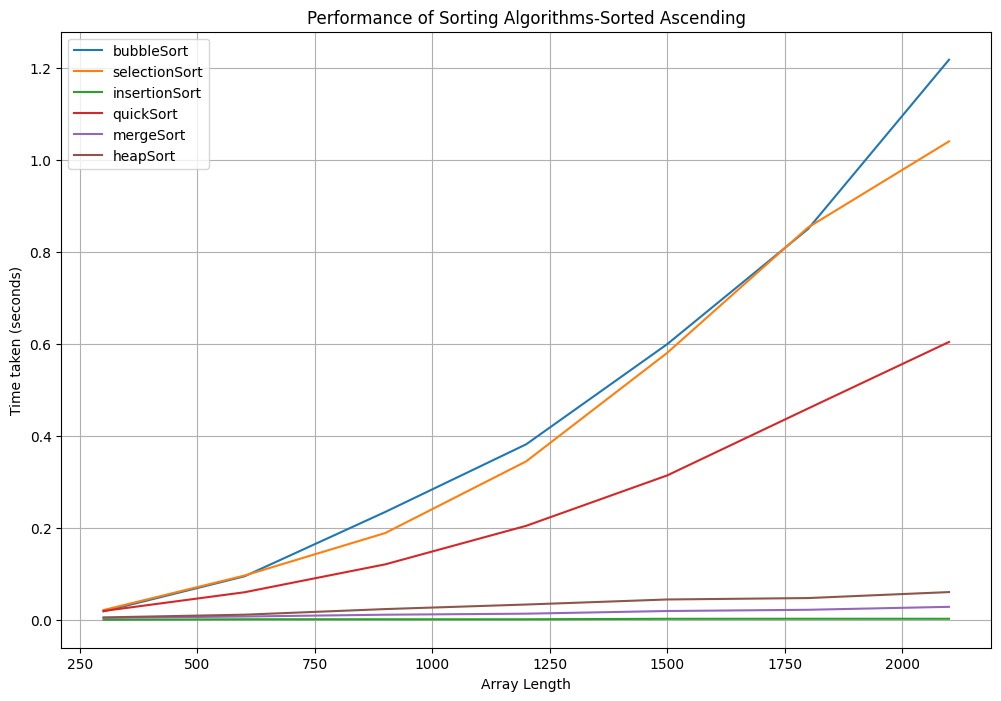

In [12]:
plt.figure(figsize=(12, 8))

for sort_func in sorting_functions:
    plt.plot(array_lengths, results1[sort_func.__name__], label=sort_func.__name__)

plt.xlabel('Array Length')
plt.ylabel('Time taken (seconds)')
plt.title('Performance of Sorting Algorithms-Sorted Ascending')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
for length in array_lengths:
    arr = np.random.randint(0, 10000, size=length)
    for sort_func in sorting_functions:
        arr_copy = np.sort(arr)[::-1]
        start_time = time.time()
        sort_func(arr_copy)
        end_time = time.time()
        time_taken = end_time - start_time
        results2[sort_func.__name__].append(time_taken)
        print(f"Array length: {length},    Sorting algorithm: {sort_func.__name__},    Time taken: {time_taken:.6f} seconds")


Array length: 300,    Sorting algorithm: bubbleSort,    Time taken: 0.075544 seconds
Array length: 300,    Sorting algorithm: selectionSort,    Time taken: 0.020996 seconds
Array length: 300,    Sorting algorithm: insertionSort,    Time taken: 0.041907 seconds
Array length: 300,    Sorting algorithm: quickSort,    Time taken: 0.017005 seconds
Array length: 300,    Sorting algorithm: mergeSort,    Time taken: 0.002996 seconds
Array length: 300,    Sorting algorithm: heapSort,    Time taken: 0.005000 seconds
Array length: 600,    Sorting algorithm: bubbleSort,    Time taken: 0.284035 seconds
Array length: 600,    Sorting algorithm: selectionSort,    Time taken: 0.099077 seconds
Array length: 600,    Sorting algorithm: insertionSort,    Time taken: 0.155907 seconds
Array length: 600,    Sorting algorithm: quickSort,    Time taken: 0.061095 seconds
Array length: 600,    Sorting algorithm: mergeSort,    Time taken: 0.006006 seconds
Array length: 600,    Sorting algorithm: heapSort,    Time 

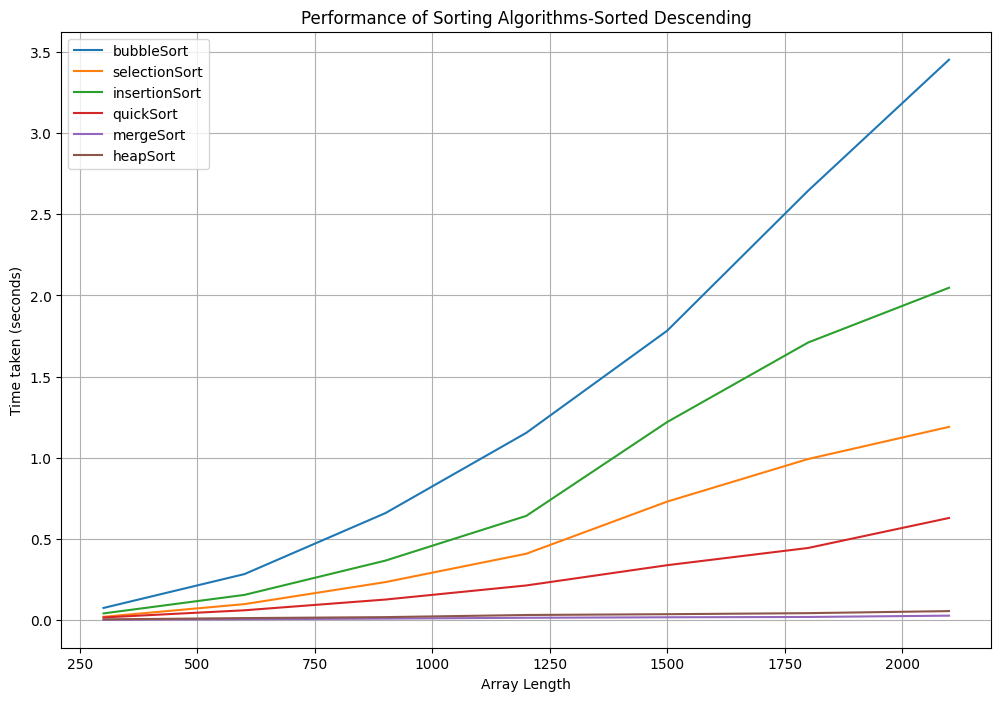

In [14]:
plt.figure(figsize=(12, 8))

for sort_func in sorting_functions:
    plt.plot(array_lengths, results2[sort_func.__name__], label=sort_func.__name__)

plt.xlabel('Array Length')
plt.ylabel('Time taken (seconds)')
plt.title('Performance of Sorting Algorithms-Sorted Descending')
plt.legend()
plt.grid(True)
plt.show()